# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [1]:
import warnings
from pydantic import BaseModel, ConfigDict
BaseModel.model_config = ConfigDict(protected_namespaces=()) # 移除 Pydantic 默认的 protected_namespaces（默认为 ("model_",)），以避免与 autogen 的 model_config 冲突

import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json

hello world!


In [2]:
from finrobot.agents.workflow import SingleAssistantShadow

After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [ ]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["gpt-4o-mini"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [5]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

[autogen.oai.client: 04-23 22:23:59] {350} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 04-23 22:23:59] {350} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 04-23 22:23:59] {350} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 04-23 22:23:59] {350} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 04-23 22:23:59] {350} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 04-23 22:23:59] {350} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 04-23 22:23:59] {350} WARNING - The API key specified is not a valid OpenAI format; i

In [7]:
company = "Microsoft"
fyear = "2023"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on Microsoft's 2023 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: <your Op**************ere>. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

The Rest Cells are optional, simply used to show the generated PDF

In [7]:
%pip install PyMuPDF

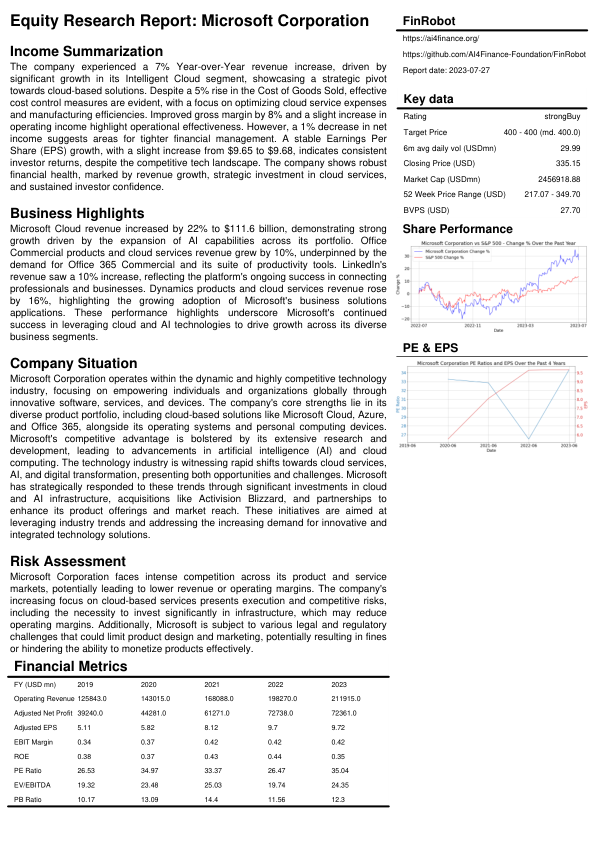

In [8]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/Microsoft_Annual_Report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)